<a href="https://colab.research.google.com/github/mfathul21/airline-customer-value/blob/main/Airline_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Customer Value Analysis

## Domain Proyek

## Business Understanding

## Data Understanding

## Data Loading

### Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Read Data

In [10]:
url = "https://drive.google.com/uc?id=14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U"
airline = pd.read_csv(url)

airline.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
42023,46746,3/13/2012,3/14/2012,Male,4,beijing,beijing,CN,28.0,3/31/2014,...,3970.0,5129,1/10/2014,82,96.500000,187,0,0.821357,5132,1
15938,24830,7/27/2012,7/27/2012,Male,4,kuerle,xinjiang,CN,38.0,3/31/2014,...,0.0,18922,3/29/2013,369,22.272727,180,0,0.799926,13690,0
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0
14922,831,9/17/2006,11/13/2006,Male,4,guangzhou,guangdong,CN,44.0,3/31/2014,...,9058.0,23470,3/15/2014,17,53.461538,178,0,0.681909,12069,0
28573,51105,12/6/2011,1/16/2012,Female,4,beijing,beijing,CN,27.0,3/31/2014,...,7045.0,9616,12/18/2013,105,46.333333,132,0,0.831728,7890,0


In [11]:
airline.shape

(62988, 23)

## Exploratory Data Analysis

### Feature Description

| Column Name       | Description                                                     |
|-------------------|-----------------------------------------------------------------|
| MEMBER_NO         | ID Member                                                       |
| FFP_DATE          | Frequent Flyer Program Join Date                                |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama                                     |
| GENDER            | Jenis Kelamin                                                   |
| FFP_TIER          | Tier dari Frequent Flyer Program                                |
| WORK_CITY         | Kota Asal                                                       |
| WORK_PROVINCE     | Provinsi Asal                                                   |
| WORK_COUNTRY      | Negara Asal                                                     |
| AGE               | Umur Customer                                                   |
| LOAD_TIME         | Tanggal data diambil                                            |
| FLIGHT_COUNT      | Jumlah penerbangan Customer                                     |
| BP_SUM            | Rencana Perjalanan                                              |
| SUM_YR_1          | Fare Revenue                                                    |
| SUM_YR_2          | Votes Prices                                                    |
| SEG_KM_SUM        | Total jarak(km) penerbangan yg sudah dilakukan                   |
| LAST_FLIGHT_DATE  | Tanggal penerbangan terakhir                                    |
| LAST_TO_END       | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL      | Rata-rata jarak waktu                                           |
| MAX_INTERVAL      | Maksimal jarak waktu                                            |
| EXCHANGE_COUNT    | Jumlah penukaran                                                |
| avg_discount      | Rata rata discount yang didapat customer                        |
| Points_Sum        | Jumlah poin yang didapat customer                               |
| Point_NotFlight   | point yang tidak digunakan oleh members                         |


In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [34]:
airline.columns = airline.columns.str.lower()

In [35]:
airline.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [36]:
airline.describe(include='O')

,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### Univariate Analysis

In [37]:
numerical_features = airline.select_dtypes(['int64', 'float64']).columns.to_list()
categorical_features = airline.select_dtypes(['object']).columns.to_list()

print(f"Jumlah Fitur Numerik: {len(numerical_features)}")
print(f"Jumlah Fitur Kategorik: {len(categorical_features)}")

Jumlah Fitur Numerik: 15
Jumlah Fitur Kategorik: 8


In [49]:
def categorical_plot(data, col):
  df = data[col].value_counts().reset_index()
  df.columns = [col, 'count']
  len_df = len(df)

  if len_df <= 10:
    sns.barplot(x=col, y='count', data=df)
    plt.title(col)
    plt.tight_layout()
    plt.show()

  else:
    top_10 = df.head(10)
    sns.barplot(x=col, y='count', data=top_10)
    plt.title(f"Top 10 of {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

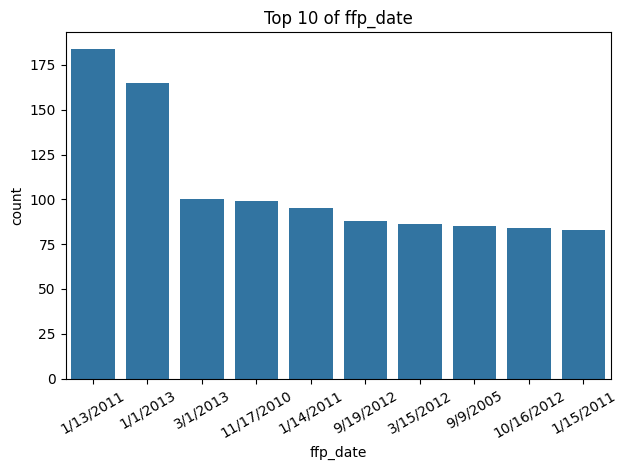

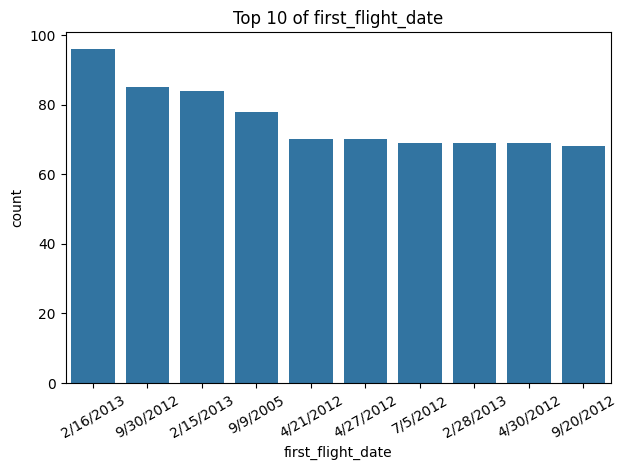

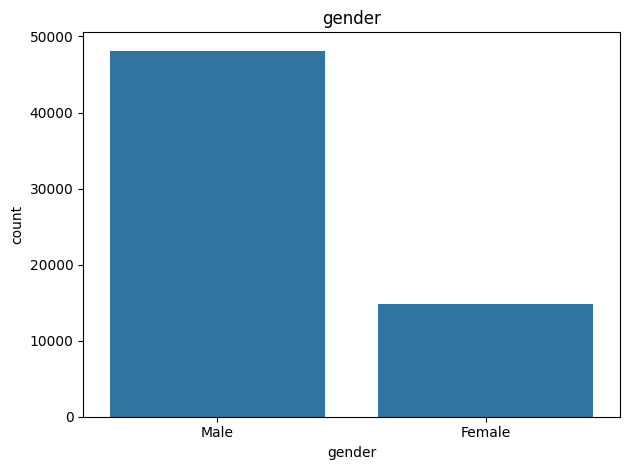

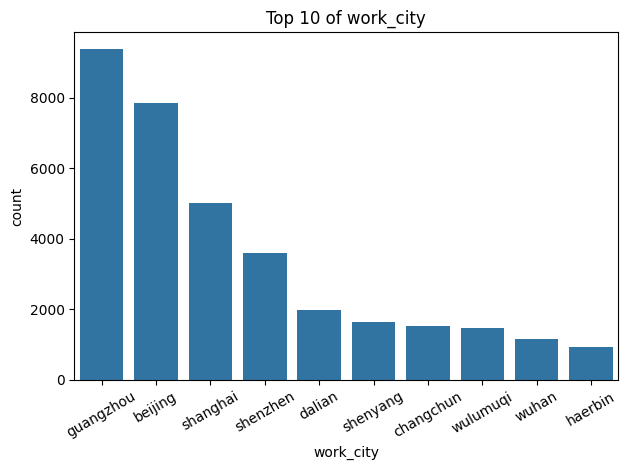

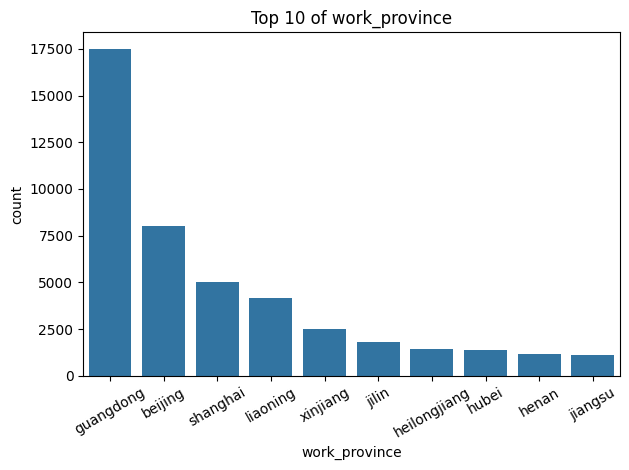

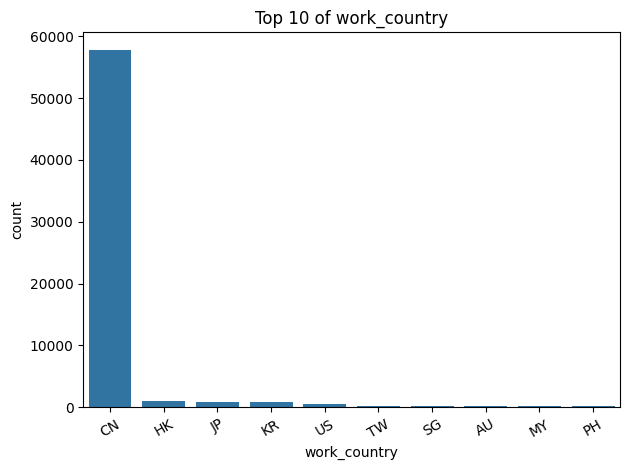

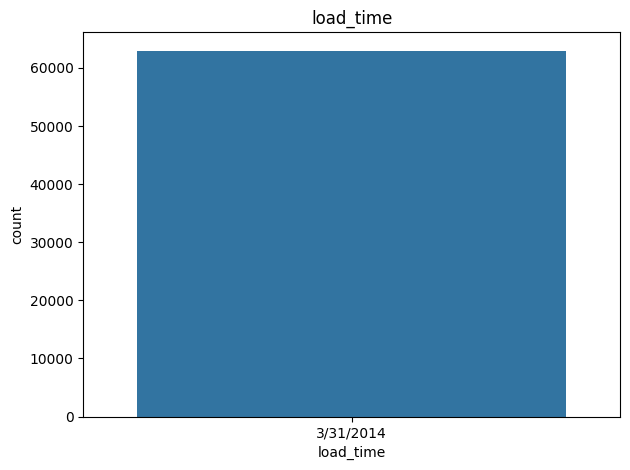

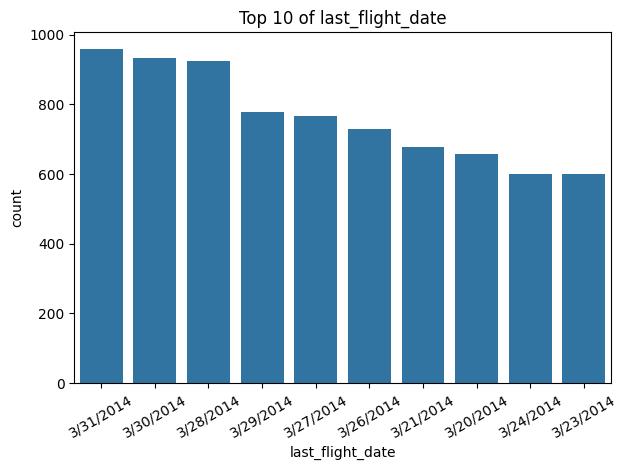

In [51]:
for col in range(len(categorical_features)):
  categorical_plot(airline, categorical_features[col])

### Multivariate Analysis